In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from sympy.abc import *
from sympy import *
init_printing()

In [2]:
def P(l, m, x):
    pmm = Number(1)
    if m > 0:
        somx2 = sqrt(1-x**2)
        fact = Number(1)
        for i in range(1, m+1):
            pmm *= -fact * somx2
            fact += 2
    if l == m:
        return pmm.simplify()
    pmmp1 = x * (2*m+1) * pmm
    if l == m+1:
        return pmmp1.simplify()
    pll = Number(0)
    for ll in range(m+2, l+1):
        pll = ((2*ll-1) * x * pmmp1 - (ll+m-1) * pmm) / (ll-m)
        pmm = pmmp1
        pmmp1 = pll
    return pll.simplify()

In [3]:
def K(l, m):
    return sqrt(((2*l+1)/(4*pi))*(factorial(l-m)/factorial(l+m))).simplify()

In [4]:
def SH(l, m, theta, phi):
    if m > 0:
        return sqrt(2)*K(l,m)*cos(m*phi)*P(l,m,cos(theta))
    elif m < 0:
        return sqrt(2)*K(l,-m)*sin(-m*phi)*P(l,-m,cos(theta))
    else:
        return K(l,m)*P(l,m,cos(theta))

In [5]:
def polar_to_vec(theta, phi):
    return cos(theta)*sin(phi), sin(theta)*sin(phi), cos(phi)
def vec_to_polar(x, y, z):
    return atan(y/x), acos(z)

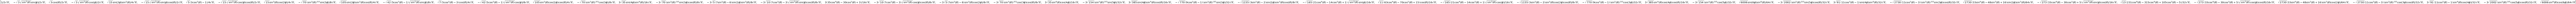

In [80]:
SHs = []
SHs_names = []
for l in range(7):
    for m in range(-l, l+1):
        SHs.append(SH(l, m, theta, phi).simplify())
        SHs_names.append(f"SH(l={l},m={m})")
SHs

In [81]:
SHs_dtheta = [sh.diff(theta).simplify() for sh in SHs]

In [82]:
SHs_dphi = [sh.diff(phi).simplify() for sh in SHs]

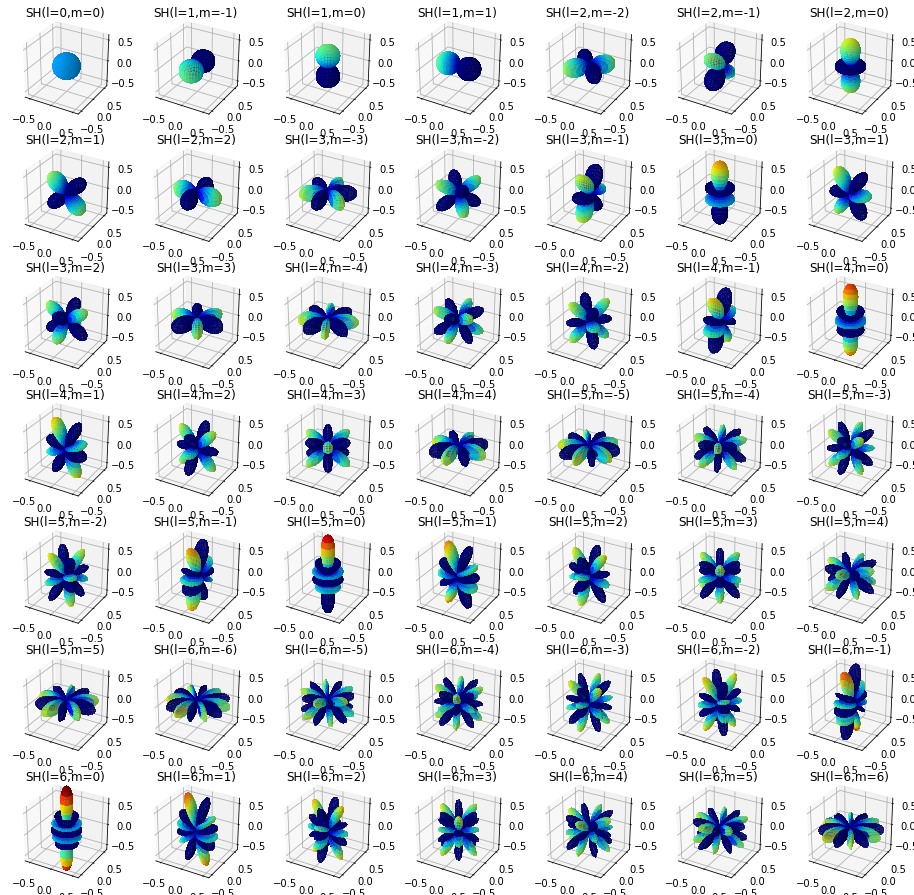

In [83]:
fig = plt.figure(figsize=(16,16))
theta_, phi_ = np.linspace(0, 1, 50), np.linspace(0, 1, 50)
theta_, phi_ = np.pi*theta_, 2*np.pi*phi_
THETA, PHI = np.meshgrid(theta_, phi_)
plot_dim = int(np.ceil(len(SHs)**0.5))
plot_lim = 0.6
for i in range(len(SHs)):
    lambda_sh = lambdify((theta,phi), SHs[i].evalf())
    R = lambda_sh(THETA, PHI) + np.zeros_like(THETA)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    Z = np.cos(THETA)
    ax = fig.add_subplot(plot_dim,plot_dim,i+1, projection='3d')
    ax.set_title(SHs_names[i])
    ax.set_xlim((-plot_lim,plot_lim))
    ax.set_ylim((-plot_lim,plot_lim))
    ax.set_zlim((-plot_lim,plot_lim))
    ax.plot_surface(
        abs(R)*X, abs(R)*Y, abs(R)*Z,
        rstride=1, cstride=1,
        facecolors=plt.cm.jet(R),
        linewidth=0, antialiased=False, alpha=0.5)
plt.show()

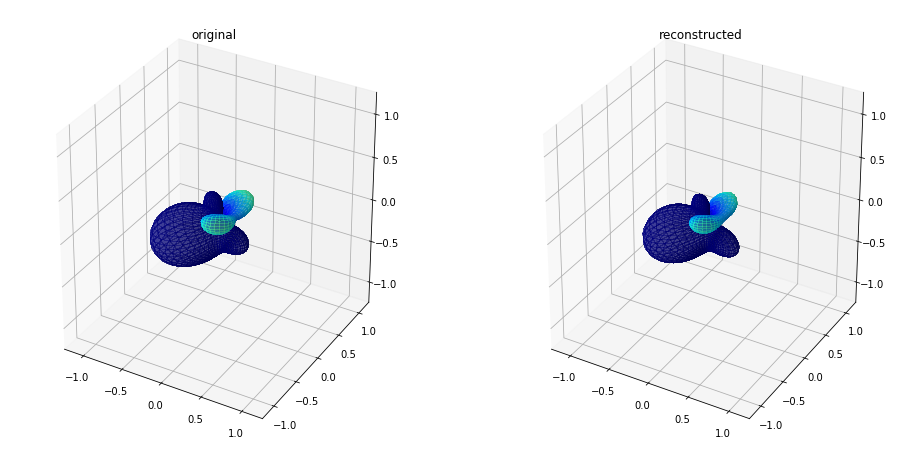

In [109]:
def original(x, y, z):
    r = np.sin(x)-np.cos(2*y)+np.sin(3*z)
    r /= 3
    return np.real(r)
fig = plt.figure(figsize=(16,8))
theta_, phi_ = np.linspace(0, 1, 50), np.linspace(0, 1, 50)
theta_, phi_ = np.pi*theta_, 2*np.pi*phi_
THETA, PHI = np.meshgrid(theta_, phi_)
plot_lim = 1.2
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
C = []
O = original(X,Y,Z)
for i in range(len(SHs)):
    lambda_sh = lambdify((theta,phi), SHs[i].evalf())
    c = 6*np.pi*np.mean(original(X,Y,Z) * lambda_sh(THETA, PHI) * np.sin(THETA))
    C.append(c)
ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_title("original")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(O)*X, abs(O)*Y, abs(O)*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(O),
    linewidth=0, antialiased=False, alpha=0.5)
R = np.zeros_like(THETA)
for i in range(len(SHs)):
    lambda_sh = lambdify((theta,phi), SHs[i].evalf())
    R += C[i] * lambda_sh(THETA, PHI)
ax = fig.add_subplot(1,2,2, projection='3d')
ax.set_title("reconstructed")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(R)*X, abs(R)*Y, abs(R)*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(R),
    linewidth=0, antialiased=False, alpha=0.5)
plt.show()